### Analysis of 'Love. Angel. Music. Baby.' by Gwen Stefani & 'Plastic Hearts' by Miley Cyrus 
#### Larissa Kidd, 11/21/2023

Although these are both two amazing female artists, both unique and talented in their own way, I have a special connection to each of these women. Firstly, "Love. Angel. Music. Baby." was the one CD that my sister and I had for our radio growing up. Besides this connection, Gwen Stefani is an amazing singer and a lovely person! On the other hand, I grew up watching Hannah Montana so I have watched as Miley Cyrus transitioned from innocent country girl to the woman she is now.
I will be conducting a comparative analysis on these two albums. 
First things first - time to import the software library that I need!

In [50]:
import requests
import pandas as pd
import base64
import json
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

Because the Spotify data is sensitive and requires an ID and a secret, I have to import my credentials to be able to access the data.

In [51]:
Client_ID = pd.read_csv('Spotify_Keys_9-19-23.txt')['Client_ID'].iloc[0]

In [52]:
Client_Secret = pd.read_csv('Spotify_Keys_9-19-23.txt')['Client_Secret'].iloc[0]

In [53]:
client_cred = base64.b64encode(str(Client_ID + ":" + Client_Secret).encode("ascii"))

In [54]:
headers = {"Authorization": "Basic {}".format(client_cred.decode("ascii"))}

In [55]:
payload = {'grant_type' : 'client_credentials'}
url = 'https://accounts.spotify.com/api/token'

In [56]:
session_key_response = requests.post(url = url, data = payload, headers = headers)

In [57]:
session_key_response.status_code

200

To ensure that the credentials are working as they should, I check the status code - and a 200 proves that things are working and my access was granted!

I am now going to store those keys so that I am able to easily access each portion of necessary data.

In [58]:
key = session_key_response.json()["access_token"]

In [59]:
session_headers = {"Authorization": "Bearer {}".format(key)}

Time to gather the unique album characters for each of my albums so that I can use them to get the album and all their tracks from Spotify

In [60]:
LAMB_ID = '3Lqn8M0QxPLIPRJ4nUKTGN'
hearts_ID = '5BRhg6NSEZOj0BR6Iz56fR'

In [61]:
LAMB_trx_url = "https://api.spotify.com/v1/albums/{}/tracks".format(LAMB_ID)

In [62]:
hearts_trx_url = "https://api.spotify.com/v1/albums/{}/tracks".format(hearts_ID)

In [63]:
LAMB_trx = requests.get(LAMB_trx_url, headers = session_headers)

In [64]:
hearts_trx = requests.get(hearts_trx_url, headers = session_headers)

In [65]:
LAMB_trx.status_code

200

In [66]:
hearts_trx.status_code

200

The 200 status code again signifies that my efforts to get the tracks from both albums was granted.

In [67]:
LAMB_dict = json.loads(LAMB_trx.text)

In [68]:
hearts_dict = json.loads(hearts_trx.text)

Because I am trying to get the audio features for each track on both albums, I need to get the track ID for each track on each album. It has to be done this way because of the way the API is structured: it asks for tracks, not albums. 

In [69]:
LAMB_dict['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

In [70]:
hearts_dict['items'][0].keys()

dict_keys(['artists', 'available_markets', 'disc_number', 'duration_ms', 'explicit', 'external_urls', 'href', 'id', 'is_local', 'name', 'preview_url', 'track_number', 'type', 'uri'])

Becuase I need to get the 'id' from 'items' over and over again until I have each track, I am going to use a code that gets each track ID and stores them in a variable.

In [71]:
LAMB_trx_ids = [x['id'] for x in LAMB_dict['items']]
LAMB_trx_ids

['7bZsx7Zif6FIhrcZrh0LVm',
 '2Y2q7PkD7lvuWr8YaZfWuv',
 '0LzrhCZFXW94Y8nwtTuRlw',
 '469RmLzEsicj8VSn9aIuKV',
 '2bx879t8gUpxkQ0avl8xTf',
 '3UQmoVQJqBYauTZLVPs3uo',
 '3L7P7HZVQ3wxzKoUyxaC9H',
 '6HJxf2Vnveoo5Hm7sZ7qOp',
 '4C5lMl6mvSfcFurWHnJrMw',
 '5YoMAg14Fh16BedS8srno2',
 '0wGcnSwFNCv9RFIMhO4ao2',
 '3ZLmAoJb6ZHlgbakKFDAyk',
 '35S0uSD4uc7cEEbYUVQysG',
 '4eimdviHxrfYJnNyqRo0DF',
 '1Sgn2gni3CExEIa29UX0bT',
 '7ocUM7mCCyNSGf3thd9w3e',
 '2fHwyosBcSdC61tQY0kWEX',
 '15EVWwhua5i9upCmjelqP3',
 '1Dt1rTzs1o5Wn5jdBHyoYR',
 '5la1Gj10lCYToqpA6bb6dU']

In [72]:
hearts_trx_ids = [x['id'] for x in hearts_dict['items']]
hearts_trx_ids

['37PJvlIfYWqEX6fgjHlnTf',
 '6qCsKKS7Ol63SJW3LOIX5R',
 '1daDRI9ahBonbWD8YcxOIB',
 '2Oycxb8QbPkpHTo8ZrmG0B',
 '4v8jmsVox8VwU5js3JHOJZ',
 '4U34WsyOvppOMnRfq7DuOy',
 '4i2qxFEVVUi8yOYoxB8TCX',
 '2LseyBkPJv7r7wCt2yMEgX',
 '0rFcav2bUNH6NC9576Viiu',
 '47KegqqrzpKw0jdHFWqtNb',
 '1M7qLcfozANPcMKfgMEHOt',
 '68qkDbsvprJRG5xw2R02dy',
 '1Tip6R4swhC7E6hgILBjrE',
 '5GK1GYXH16RdfmltogHhAk',
 '0olaaJrCBTMJJvqPdvNpsx']

I need to make them into a string now so that I may input them into the URL

In [73]:
LAMB_trx_str = ','.join(str(x) for x in LAMB_trx_ids)
LAMB_trx_str

'7bZsx7Zif6FIhrcZrh0LVm,2Y2q7PkD7lvuWr8YaZfWuv,0LzrhCZFXW94Y8nwtTuRlw,469RmLzEsicj8VSn9aIuKV,2bx879t8gUpxkQ0avl8xTf,3UQmoVQJqBYauTZLVPs3uo,3L7P7HZVQ3wxzKoUyxaC9H,6HJxf2Vnveoo5Hm7sZ7qOp,4C5lMl6mvSfcFurWHnJrMw,5YoMAg14Fh16BedS8srno2,0wGcnSwFNCv9RFIMhO4ao2,3ZLmAoJb6ZHlgbakKFDAyk,35S0uSD4uc7cEEbYUVQysG,4eimdviHxrfYJnNyqRo0DF,1Sgn2gni3CExEIa29UX0bT,7ocUM7mCCyNSGf3thd9w3e,2fHwyosBcSdC61tQY0kWEX,15EVWwhua5i9upCmjelqP3,1Dt1rTzs1o5Wn5jdBHyoYR,5la1Gj10lCYToqpA6bb6dU'

In [74]:
hearts_trx_str = ','.join(str(x) for x in hearts_trx_ids)
hearts_trx_str

'37PJvlIfYWqEX6fgjHlnTf,6qCsKKS7Ol63SJW3LOIX5R,1daDRI9ahBonbWD8YcxOIB,2Oycxb8QbPkpHTo8ZrmG0B,4v8jmsVox8VwU5js3JHOJZ,4U34WsyOvppOMnRfq7DuOy,4i2qxFEVVUi8yOYoxB8TCX,2LseyBkPJv7r7wCt2yMEgX,0rFcav2bUNH6NC9576Viiu,47KegqqrzpKw0jdHFWqtNb,1M7qLcfozANPcMKfgMEHOt,68qkDbsvprJRG5xw2R02dy,1Tip6R4swhC7E6hgILBjrE,5GK1GYXH16RdfmltogHhAk,0olaaJrCBTMJJvqPdvNpsx'

In [75]:
LAMB_ep_ft = "https://api.spotify.com/v1/audio-features?ids={}".format(LAMB_trx_str)

In [76]:
hearts_ep_ft = "https://api.spotify.com/v1/audio-features?ids={}".format(hearts_trx_str)

In [77]:
LAMB_features = requests.get(LAMB_ep_ft, headers = session_headers)

In [78]:
hearts_features = requests.get(hearts_ep_ft, headers = session_headers)

In [79]:
LAMB_features.status_code

200

In [80]:
hearts_features.status_code

200

The 200 status code again lets me know that the URL access and the request.get were successful

In [81]:
LAMB_ft_dict = json.loads(LAMB_features.text)

In [82]:
hearts_ft_dict = json.loads(hearts_features.text)

In [83]:
LAMB_ft_dict.keys()

dict_keys(['audio_features'])

In [84]:
hearts_ft_dict.keys()

dict_keys(['audio_features'])

By looking at the keys, I know that the only key is audio_features so I don't have to navigate anywhere deeper to get the audio_features for each track

In [85]:
LAMB_ft_dict['audio_features'][0]

{'danceability': 0.676,
 'energy': 0.948,
 'key': 5,
 'loudness': -2.557,
 'mode': 1,
 'speechiness': 0.0628,
 'acousticness': 0.0509,
 'instrumentalness': 8.19e-06,
 'liveness': 0.384,
 'valence': 0.731,
 'tempo': 136.027,
 'type': 'audio_features',
 'id': '7bZsx7Zif6FIhrcZrh0LVm',
 'uri': 'spotify:track:7bZsx7Zif6FIhrcZrh0LVm',
 'track_href': 'https://api.spotify.com/v1/tracks/7bZsx7Zif6FIhrcZrh0LVm',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/7bZsx7Zif6FIhrcZrh0LVm',
 'duration_ms': 221227,
 'time_signature': 4}

In [86]:
hearts_ft_dict['audio_features'][0]

{'danceability': 0.564,
 'energy': 0.849,
 'key': 4,
 'loudness': -2.619,
 'mode': 0,
 'speechiness': 0.248,
 'acousticness': 0.00255,
 'instrumentalness': 0,
 'liveness': 0.269,
 'valence': 0.634,
 'tempo': 157.905,
 'type': 'audio_features',
 'id': '37PJvlIfYWqEX6fgjHlnTf',
 'uri': 'spotify:track:37PJvlIfYWqEX6fgjHlnTf',
 'track_href': 'https://api.spotify.com/v1/tracks/37PJvlIfYWqEX6fgjHlnTf',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/37PJvlIfYWqEX6fgjHlnTf',
 'duration_ms': 171800,
 'time_signature': 4}

Now, I am going to create a dataframe of all the audio features for each track for each album 

In [87]:
LAMB_df = pd.DataFrame(LAMB_ft_dict['audio_features'])
LAMB_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.676,0.948,5,-2.557,1,0.0628,0.050900,0.000008,0.3840,0.731,136.027,audio_features,7bZsx7Zif6FIhrcZrh0LVm,spotify:track:7bZsx7Zif6FIhrcZrh0LVm,https://api.spotify.com/v1/tracks/7bZsx7Zif6FI...,https://api.spotify.com/v1/audio-analysis/7bZs...,221227,4
1,0.856,0.754,7,-2.728,0,0.0416,0.029400,0.000015,0.2060,0.722,98.018,audio_features,2Y2q7PkD7lvuWr8YaZfWuv,spotify:track:2Y2q7PkD7lvuWr8YaZfWuv,https://api.spotify.com/v1/tracks/2Y2q7PkD7lvu...,https://api.spotify.com/v1/audio-analysis/2Y2q...,236213,4
2,0.926,0.916,10,-2.221,0,0.0929,0.350000,0.000006,0.0234,0.904,110.007,audio_features,0LzrhCZFXW94Y8nwtTuRlw,spotify:track:0LzrhCZFXW94Y8nwtTuRlw,https://api.spotify.com/v1/tracks/0LzrhCZFXW94...,https://api.spotify.com/v1/audio-analysis/0Lzr...,199853,4
3,0.709,0.721,2,-3.520,1,0.0281,0.032200,0.000309,0.3550,0.801,112.019,audio_features,469RmLzEsicj8VSn9aIuKV,spotify:track:469RmLzEsicj8VSn9aIuKV,https://api.spotify.com/v1/tracks/469RmLzEsicj...,https://api.spotify.com/v1/audio-analysis/469R...,189333,4
4,0.566,0.976,1,-3.866,1,0.2620,0.000527,0.002650,0.1140,0.354,193.979,audio_features,2bx879t8gUpxkQ0avl8xTf,spotify:track:2bx879t8gUpxkQ0avl8xTf,https://api.spotify.com/v1/tracks/2bx879t8gUpx...,https://api.spotify.com/v1/audio-analysis/2bx8...,222360,4


In [88]:
hearts_df = pd.DataFrame(hearts_ft_dict['audio_features'])
hearts_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.564,0.849,4,-2.619,0,0.2480,0.00255,0.0,0.2690,0.634,157.905,audio_features,37PJvlIfYWqEX6fgjHlnTf,spotify:track:37PJvlIfYWqEX6fgjHlnTf,https://api.spotify.com/v1/tracks/37PJvlIfYWqE...,https://api.spotify.com/v1/audio-analysis/37PJ...,171800,4
1,0.551,0.756,2,-4.948,1,0.0652,0.05110,0.0,0.0765,0.618,175.984,audio_features,6qCsKKS7Ol63SJW3LOIX5R,spotify:track:6qCsKKS7Ol63SJW3LOIX5R,https://api.spotify.com/v1/tracks/6qCsKKS7Ol63...,https://api.spotify.com/v1/audio-analysis/6qCs...,205733,4
2,0.672,0.642,5,-4.035,1,0.0313,0.09810,0.0,0.1000,0.494,121.981,audio_features,1daDRI9ahBonbWD8YcxOIB,spotify:track:1daDRI9ahBonbWD8YcxOIB,https://api.spotify.com/v1/tracks/1daDRI9ahBon...,https://api.spotify.com/v1/audio-analysis/1daD...,196453,4
3,0.781,0.670,3,-3.912,0,0.0452,0.01030,0.0,0.0761,0.595,127.990,audio_features,2Oycxb8QbPkpHTo8ZrmG0B,spotify:track:2Oycxb8QbPkpHTo8ZrmG0B,https://api.spotify.com/v1/tracks/2Oycxb8QbPkp...,https://api.spotify.com/v1/audio-analysis/2Oyc...,169333,4
4,0.659,0.765,0,-5.392,0,0.0591,0.04280,0.0,0.0783,0.410,89.983,audio_features,4v8jmsVox8VwU5js3JHOJZ,spotify:track:4v8jmsVox8VwU5js3JHOJZ,https://api.spotify.com/v1/tracks/4v8jmsVox8Vw...,https://api.spotify.com/v1/audio-analysis/4v8j...,151720,4


Awesome! Now that the audio features are collected, I'd like to compare two different audio features across both albums. I would like to judge the danceability and the valence of both tracks because I feel these two have lower correlation and would be able to demonstrate two enjoyable parts about listening to music: the dancing and the feelings!

To be able to compare all audio_features from both albums, I think it will be easiest to concatenate the dataframes on top of one another 

In [89]:
joined_df = pd.concat([LAMB_df, hearts_df], keys=['Love. Angel. Music. Baby.','Plastic Hearts'])
joined_df

danceability  energy  key  loudness  mode  \
Love. Angel. Music. Baby. 0          0.676   0.948    5    -2.557     1   
                          1          0.856   0.754    7    -2.728     0   
                          2          0.926   0.916   10    -2.221     0   
                          3          0.709   0.721    2    -3.520     1   
                          4          0.566   0.976    1    -3.866     1   
                          5          0.811   0.726    0    -3.995     1   
                          6          0.876   0.821    3    -4.402     0   
                          7          0.785   0.929    9    -1.635     1   
                          8          0.681   0.827    8    -5.557     1   
                          9          0.791   0.836    9    -2.417     0   
                          10         0.677   0.927    2    -1.956     0   
                          11         0.704   0.930    6    -3.768     1   
                          12         0.645   0.278    3    -9.131     1   
                          13         0.755   0.747    7    -6.727     0   
                          14         0.696   0.749    7    -6.460     0   
                          15         0.643   0.820    7    -5.130     0   
                          16         0.831   0.857    1    -5.073     1   
                          17         0.968   0.949    9    -4.044     1   
                          18         0.521   0.842    9    -6.387     1   
                          19         0.826   0.809   10    -3.559     0   
Plastic Hearts            0          0.564   0.849    4    -2.619     0   
                          1          0.551   0.756    2    -4.948     1   
                          2          0.672   0.642    5    -4.035     1   
                          3          0.781   0.670    3    -3.912     0   
                          4          0.659   0.765    0    -5.392     0   
                          5          0.638   0.918   11    -4.368     1   
                          6          0.699   0.805    4    -5.535     0   
                          7          0.474   0.540    5    -6.862     1   
                          8          0.652   0.597    6    -6.536     0   
                          9          0.820   0.568    4    -6.963     1   
                          10         0.475   0.565    1    -7.853     0   
                          11         0.537   0.506   11    -6.139     1   
                          12         0.681   0.737    4    -5.246     0   
                          13         0.580   0.908    4    -5.303     1   
                          14         0.407   0.872    7    -5.001     1   

                              speechiness  acousticness  instrumentalness  \
Love. Angel. Music. Baby. 0        0.0628      0.050900          0.000008   
                          1        0.0416      0.029400          0.000015   
                          2        0.0929      0.350000          0.000006   
                          3        0.0281      0.032200          0.000309   
                          4        0.2620      0.000527          0.002650   
                          5        0.0813      0.154000          0.000000   
                          6        0.0651      0.109000          0.000000   
                          7        0.0424      0.019200          0.000000   
                          8        0.0341      0.013800          0.000000   
                          9        0.0359      0.124000          0.000020   
                          10       0.0362      0.003910          0.000009   
                          11       0.2180      0.012800          0.000142   
                          12       0.0347      0.894000          0.000000   
                          13       0.0441      0.000474          0.431000   
                          14       0.0359      0.002010          0.643000   
                          15       0.0504      0.059500          0.000000   
                    

The first plot will use this joined dataframe to show the Valence (on the left) of all tracks from both albums and the Danceability (on the right) of all tracks from both albums.

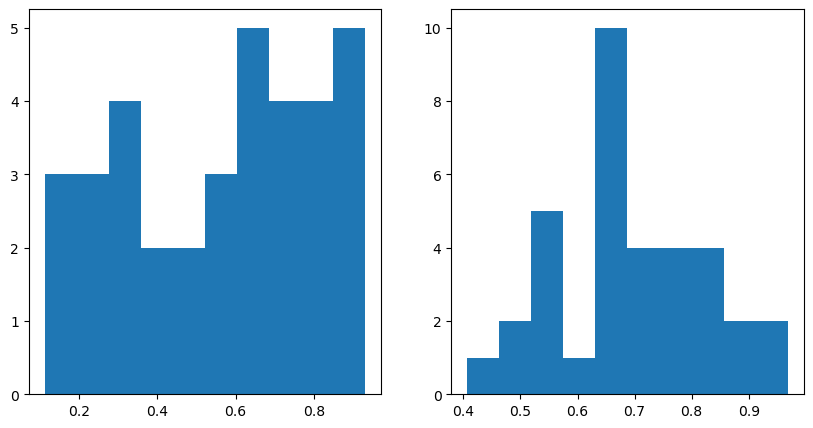

In [90]:
fig1, ax1 = plt.subplots(1,2, figsize = (10,5))

ax1[0].hist(joined_df['valence'])
ax1[1].hist(joined_df['danceability'])

ax1[0].set_ylim()

plt.show()

When looking at both albums combined, the majority of songs have a valence at or above .6

With the danceability, it is interesting that 10 songs fall in the bin of around .65-.69

For the next figure, I am using the separate dataframes to take a closer look at each album's danceability and valence. I am plotting the relationship between these two features for each album.

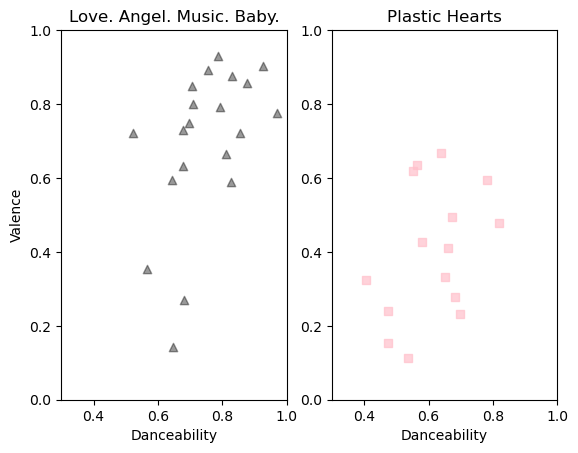

In [91]:
fig2, ax2 = plt.subplots(1,2)
ax2[0].scatter(x = LAMB_df['danceability'],
           y = LAMB_df['valence'], 
            label = 'L.A.M.B.', color = 'black', 
            marker = '^', alpha = .4)
ax2[1].scatter(x = hearts_df['danceability'],
           y = hearts_df['valence'],
               marker="s",color="pink", alpha = .7)

ax2[0].set_xlabel('Danceability')
ax2[0].set_ylabel('Valence')
ax2[1].set_xlabel('Danceability')

ax2[0].set_title('Love. Angel. Music. Baby.')
ax2[1].set_title('Plastic Hearts')

ax2[0].set_ylim(bottom=0,top=1)
ax2[1].set_ylim(bottom=0,top=1)

ax2[0].set_xlim(left=.3,right=1)
ax2[1].set_xlim(left=.3,right=1)

plt.show()

The "Love. Angel. Music. Baby." album tends to have a valence and danceability above .55, pulling the scatter plot points to the upper right corner of the plot. Track from "Plastic Hearts", however, tend to have a valence below .7 and a danceability below .85, creating a spread in the lower half of plot. 

To get a better perspective of their spread, I am now plotting the relationship of Danceability and Valence for each album on the same plot - representing them with their unique marker.

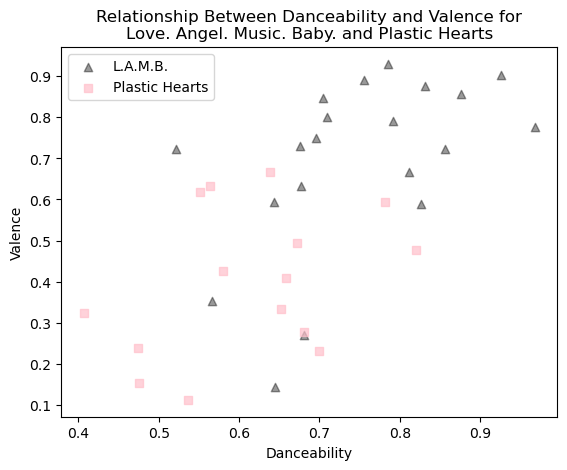

In [92]:
fig3, ax3 = plt.subplots()
ax3.scatter(x = LAMB_df['danceability'],
           y = LAMB_df['valence'], 
            label = 'L.A.M.B.', color = 'black', 
            marker = '^', alpha = .4)
ax3.scatter(x = hearts_df['danceability'],
           y = hearts_df['valence'], 
            label = 'Plastic Hearts', color = 'pink', 
            marker = 's', alpha = .7)

ax3.set_xlabel('Danceability')
ax3.set_ylabel('Valence')

ax3.set_title('Relationship Between Danceability and Valence for\nLove. Angel. Music. Baby. and Plastic Hearts')
ax3.legend()

plt.show()

In this plot, it is very obvious that the grey triangles, representing Gwen Stefani's "Love. Angel. Music. Baby." album, are lonesome in the upper right hand corner while the pink squares, representing Miley Cyrus' "Plastic Hearts" album, are lonesome in the bottom left corner with low danceability and valence. It is interesting, though, that valence and danceability seem to have correlation as they tend to be closer to the y=x line.

Lastly, I want to take a closer look at the danceability for each album separately and see how it is distributed. 

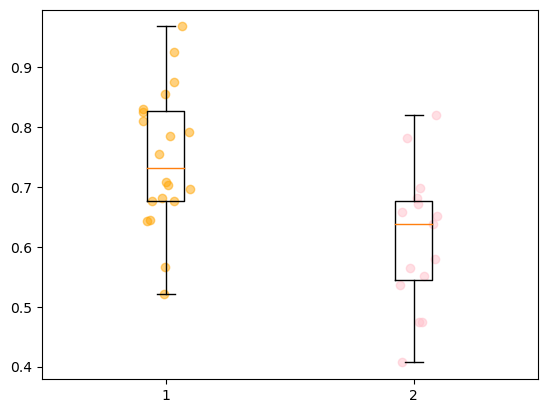

In [93]:
LAMB_dance = LAMB_df['danceability']
hearts_dance = hearts_df['danceability']

LAMB_xs = [1] * len(LAMB_dance)
hearts_xs = [2] * len(hearts_dance)
LAMB_x_jitter = np.random.uniform(-0.10, .10, len(LAMB_xs))
hearts_x_jitter = np.random.uniform(-.10, .10, len(hearts_xs))

fig4, ax4 = plt.subplots()
ax4.boxplot(LAMB_dance, positions = [1])
ax4.boxplot(hearts_dance, positions = [2])
ax4.scatter(LAMB_xs + LAMB_x_jitter, LAMB_dance, color = 'orange', alpha = .5)
ax4.scatter(hearts_xs + hearts_x_jitter, hearts_dance,color = 'pink', alpha = .5)


plt.show()
plt.show()

On the left, the boxplot for "Love. Angel. Music. Baby." is shifted higher than the box plot for "Plastic Hearts" because the danceabilities are greater for "Love. Angel. Music. Baby" than they are for "Plastic Hearts"

To wrap up my analysis, I want to look at the t-test for these albums.

In [94]:
stat_result = stats.ttest_ind(LAMB_dance, hearts_dance)
stat_result

TtestResult(statistic=3.408868963752827, pvalue=0.001735982437162026, df=33.0)

The statistic represents the t-value. The smaller the t-value, the more similarity exists between the two sample sets. Because the value is 3, it shows that the albums are alike in their audio_features.
Because the p-value is less than 1%, this shows that there is significance in the t-value.  